<a href="https://www.kaggle.com/code/seifhkungulio/diamond-analysis-with-python-matplotlib?scriptVersionId=178097781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Diamond Analysis with Python (Matplotlib)**

## **Background**

This dataset comprises the prices and diverse attributes of nearly 54,000 diamond rows. It was initially published on Kaggle by Shivam Agrawal.

A data frame with 53940 rows and 10 variables:
price: price in US dollars (326--18,823)
carat: weight of the diamond (0.2--5.01)
cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color: diamond colour, from J (worst) to D (best)
clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x: length in mm (0--10.74)
y: width in mm (0--58.9)
z: depth in mm (0--31.8)
depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
table: width of top of diamond relative to widest point (43--95)

Sources:
Shivam, A. "Diamonds" [https://www.kaggle.com/datasets/shivam2503/diamonds/data]

## **Import Libraries and Load Data**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        # Set plotting style
plt.style.use('dark_background')
pd.set_option("display.max_columns", 100)

# Load the dataset
df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv", sep=",")

/kaggle/input/diamonds/diamonds.csv


## **Data Exploration, Cleaning, and Preprocessing**

### **Data Exploration**

In [2]:
# Drop the unnamed column from the dataframe
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

# Display the first five rows of the dataframe
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Display the last five rows of the dataframe
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [4]:
# Retrieve the dimensions of a dataframe
df.shape

(53940, 10)

In [5]:
# Generate descriptive statistics of a dataframe
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Check for missing values
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [7]:
# Check the data type of each column
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
# Values with their counts in a cut column
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [9]:
# Values with their counts in a color column 
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [10]:
# Values with their counts in a clarity column 
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

### **Data Cleaning**

In [11]:
# Checking for any missing values
df.isna().sum()*100/df.shape[0]

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [12]:
# Removes any rows from the DataFrame that contain missing values (NaN) 
# and resets the index to a sequential numerical index starting from 0.
# df.dropna().reset_index(drop=True) -- Since there was no missing values, I had to comment this line

### **Data Preprocessing: Create variables to be used on plotting**

In [13]:
# Group dataframe by cut to be used to create scatter plot
groups = df.groupby("cut")

In [14]:
# Calculate the average price for each clarity category to be used to create bar chart
avg_price_by_clarity = df.groupby("clarity")["price"].mean()

In [15]:
# Group by cut and color and calculate the mean price to be used to create stacked bar chart
grouped = df.groupby(["cut", "color"])["price"].mean().unstack()

## **Data Visualization**

### **Creating a Scatter Plot Chart**

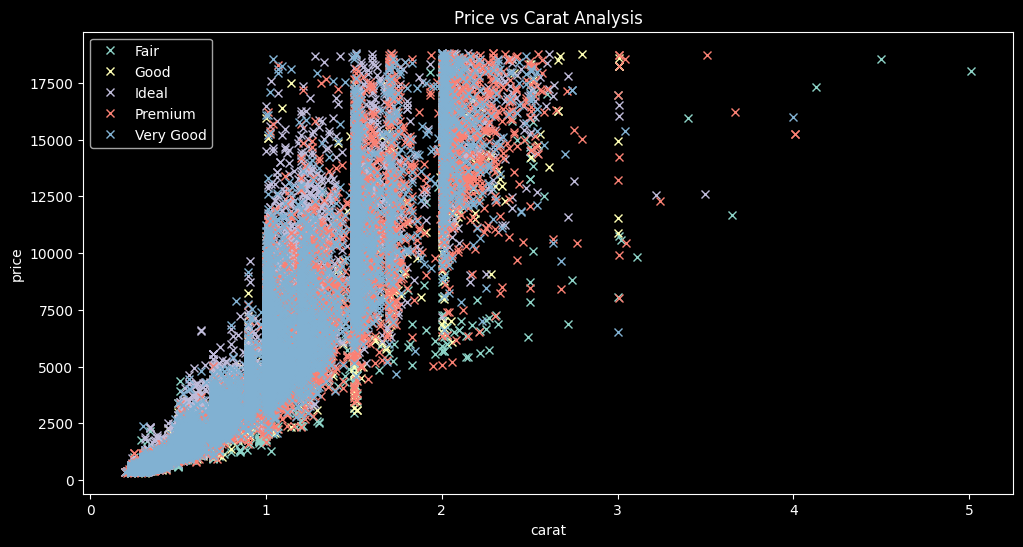

In [16]:
# Create  a scatter plot chart
plt.figure(figsize=[12,6])
for i, group in groups:
    plt.plot(group["carat"], group["price"], marker="x", linestyle="", label=i)

plt.xlabel('carat')
plt.ylabel('price')
plt.title('Price vs Carat Analysis')
plt.legend()
plt.show()

### **Creating a Bar Chart**

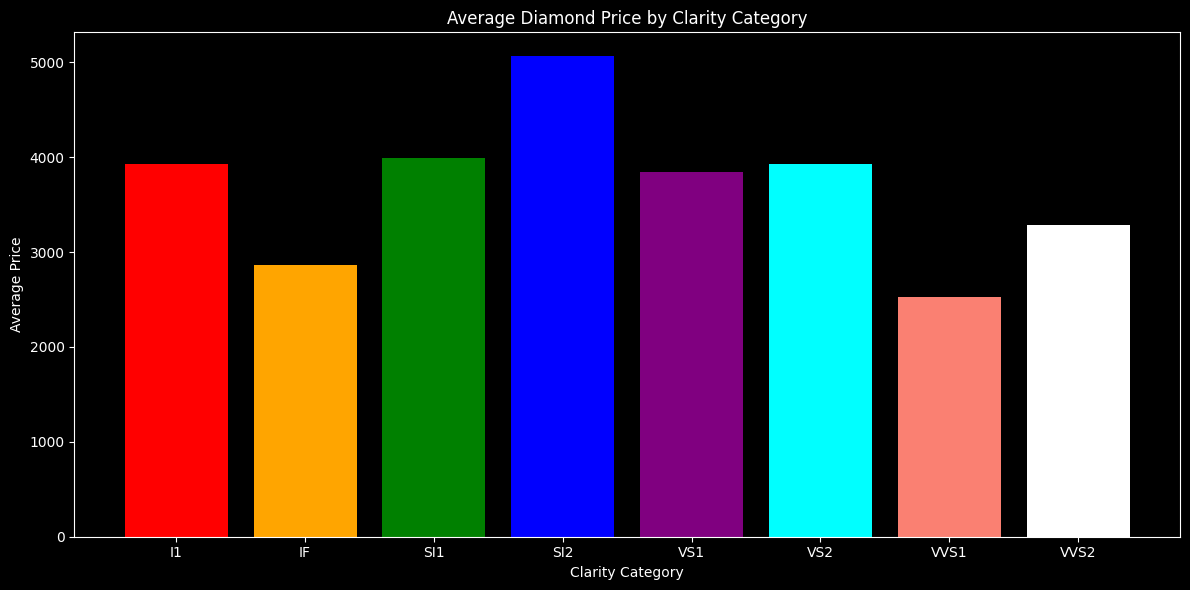

In [17]:
# Create the bar plot
colors = ["red", "orange", "green", "blue", "purple", "cyan", "salmon", "white"]
plt.figure(figsize=[12,6])
plt.bar(x=avg_price_by_clarity.index, height=avg_price_by_clarity.values, color=colors)
plt.xlabel("Clarity Category")
plt.ylabel("Average Price")
plt.title("Average Diamond Price by Clarity Category")
plt.tight_layout()
plt.show()

### **Creating a Histogram Chart**

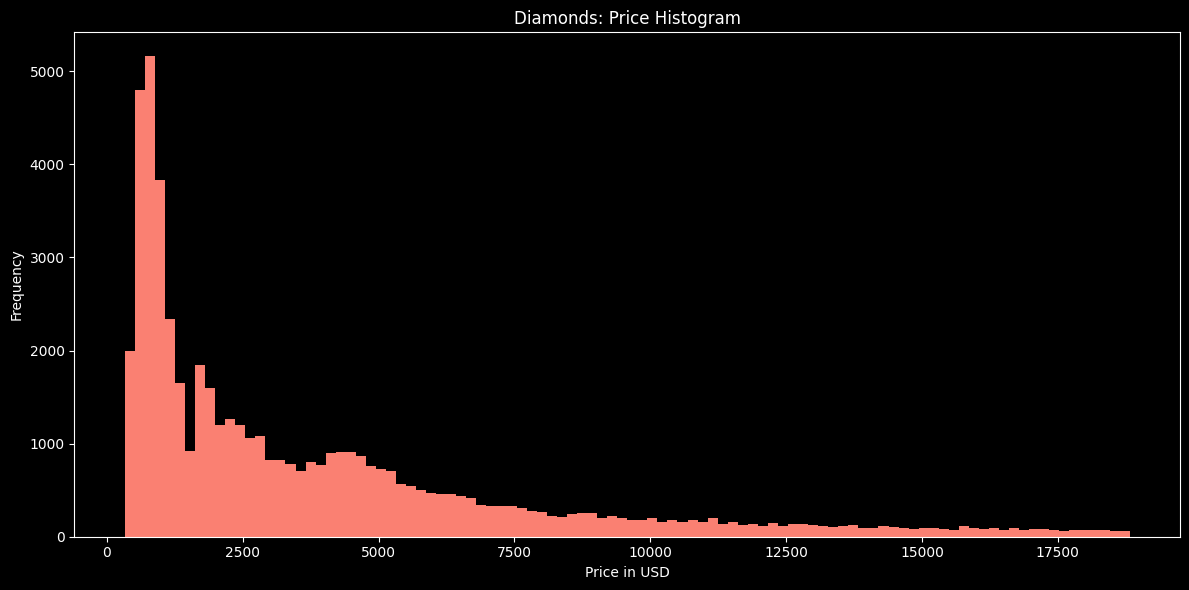

In [18]:
# Plot the histogram of the price variable
plt.figure(figsize=[12,6])
plt.hist(df["price"], bins=100, color="salmon")
plt.xlabel("Price in USD")
plt.ylabel("Frequency")
plt.title("Diamonds: Price Histogram")
plt.tight_layout()
plt.show()

### **Creating a Stacked Bar Chart**

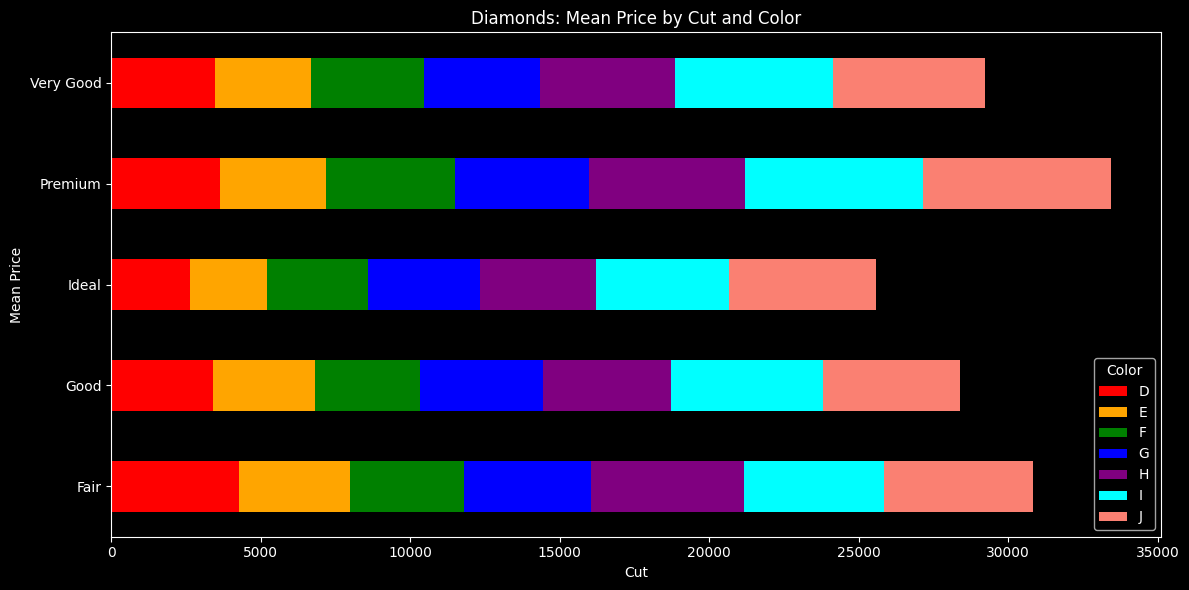

In [19]:
# Plot the stacked bar chart
colors = ["red", "orange", "green", "blue", "purple", "cyan", "salmon"]
grouped.plot(kind="barh", stacked=True, color=colors, figsize=(12, 6))
plt.xlabel("Cut")
plt.ylabel("Mean Price")
plt.title("Diamonds: Mean Price by Cut and Color")
plt.legend(title="Color")
plt.tight_layout()
plt.show()

### **Creating a Subplot Charts**

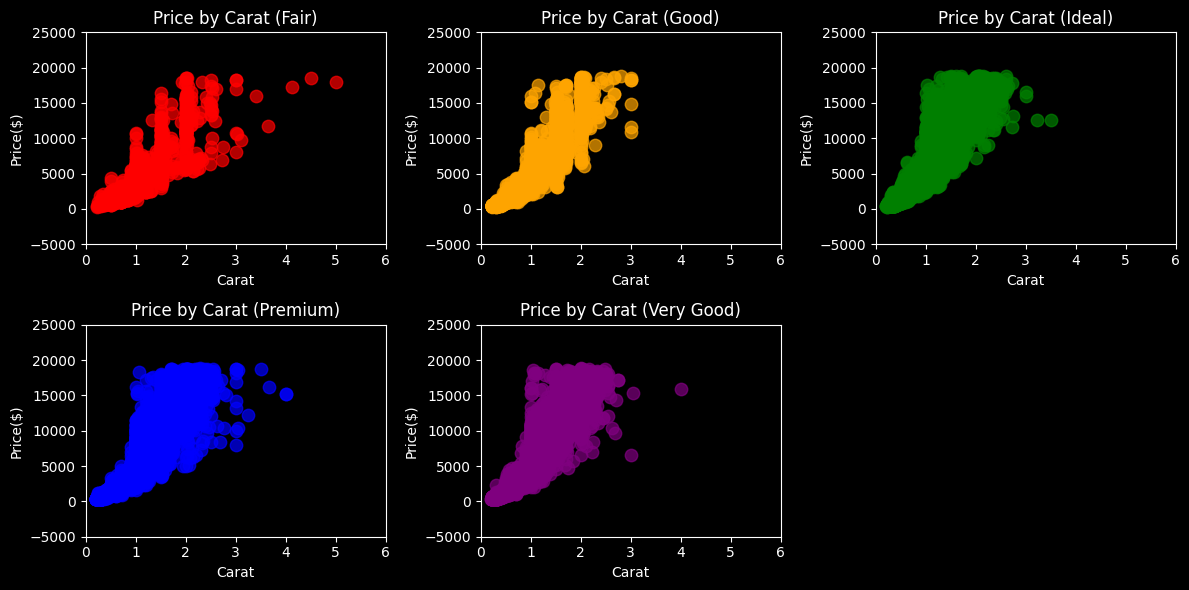

In [20]:
n = len(df.cut)
cut_list = ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
color_list = ["red", "orange", "green", "blue", "purple"]
   
plt.figure(figsize=[12, 6])
for i in range(0, len(cut_list)):
    
    plt.subplot(2,3,i+1)
    
    current_cut = cut_list[i]
    temp_carat = [df.carat[i] for i in range(n) if df.cut[i] == current_cut]
    temp_price = [df.price[i] for i in range(n) if df.cut[i] == current_cut]
    
    plt.scatter(x=temp_carat, y=temp_price, s=80, alpha=0.7,
                color=color_list[i], edgecolor=color_list[i])
   
    plt.xlim([0, 6])
    plt.ylim([-5000, 25000])
    plt.xlabel('Carat')
    plt.ylabel('Price($)')
    plt.title('Price by Carat (' + current_cut.title()+')')
   
plt.tight_layout()
plt.show()